# Описание проекта

Обьект изучения интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кaмпании.     
Даны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.     
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели:**   
Выявить определяющие успешность игры закономерности и составить портрет пользователя каждого региона.

**Задачи:**  
1. Посмотреть, сколько игр выпускалось в разные годы и как менялись продажи по платформам. 
2. Узнать, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ. 
3. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, а также посмотреть на общее распределение игр по жанрам. 
4. Определить популярные платформы и жантры (топ-5) 
5. Узнать, влияет ли рейтинг ESRB на продажи в отдельном регионе.
6. Проверка гипотез:  
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Описание данных

- `Name` — название игры   
- `Platform` — платформа  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр игры  
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
- `EU_sales` — продажи в Европе (миллионы проданных копий)  
- `JP_sales` — продажи в Японии (миллионы проданных копий)  
- `Other_sales` — продажи в других странах (миллионы проданных копий)  
- `Critic_Score` — оценка критиков (максимум 100)  
- `User_Score` — оценка пользователей (максимум 10) 
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Изучение данных из файла

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [90]:
df = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/Сборный_проект/games.csv')
display(df.head())
display(df.describe())
display(df.info())
df[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release', 'Genre'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


В данных есть небольшие недочеты, например неправильные типы данных, не округленные значения и разный регистр, которые нужно исправить.

## Предобработка данных

### Замена названия столбцов

In [91]:
# првиедем названия столбцов к нижнему регистру для удобства 
df = df.rename(columns=str.lower)

# приведение к нижнему регистру столбыцы "name" и "genre"
df['platform'] = df['platform'].str.lower()
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена типа данных

In [92]:
# преобразовываем данные в нужные типы 
df['year_of_release'] = df['year_of_release'].astype('Int64')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

In [93]:
# смотрим наличие пропусков 
print(df.isna().sum())
df['genre'].unique()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [94]:
len(df['genre'].isnull())

16715

In [95]:
# замена аббревиатуры 'tbd' на 'Nan'
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float64')
df['genre'] = df['genre'].fillna(value='')
df['genre'].dropna()
df['name'] = df['name'].fillna(value='')
df['name'].dropna()
df['rating'] = df['rating'].replace(np.nan, 'nan')

Обнаружены пропуски в оценках пользоваетлей и критиков, а также в рейтингах от организации ESRB. Пропуски в оценках критиков и пользователей не целесообразно заполнять, т.к. качество данных может ухудшиться. Пропуски в данных с рейтингом заменим на "nan".
В таблице с оценками пользователей "user_score" была обнаружена аббревиатура 'tbd', заменим ее на "Nan".

In [96]:
# расчет суммарных продаж во всех регионах
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Произведен расчет суммарных продаж во всех регионах и записан в отдельный столбец "total_sales". 

## Исследовательский анализ данных


In [97]:
# смотрим сколько игр выпускалось в разные года.
display(df.groupby('year_of_release')['name'].count())

# делаем срез данных периода (возьмем период с 1994 года )
df = df[df['year_of_release'] > 1994]
#df['year_of_release'].unique()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Судя по данным, игры активно начали выпускатся с 1995 по 2016 г., возьмем именно этот период для анализа.

platform
ps2     1233.56
x360     961.24
ps3      931.34
wii      891.18
ds       802.76
Name: total_sales, dtype: float64

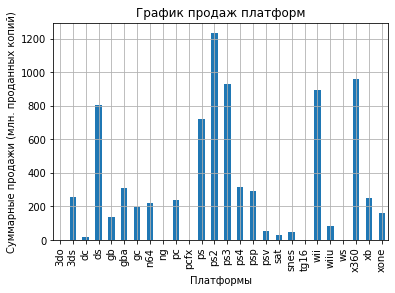

In [98]:
# Посмотрим как менялись продажи по платформам
sales_by_plarform = df.groupby('platform')['total_sales'].sum().plot(kind='bar', grid=True)
plt.title('График продаж платформ')
plt.ylabel('Суммарные продажи (млн. проданных копий)')
plt.xlabel('Платформы')
    
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_platforms

Был построен график продаж по плаформам, на котором видна динамика всех платформ. 
<br /> В топ-5 платформ по продажам вошли:
1. PS2
2. X360
3. PS3
4. WII
5. DS

In [99]:
# создадим таблицу с топ-5 платформами 
top_platforms = df[df['platform'].isin(top_platforms.index)]
top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,ds,2009,sports,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01
16704,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,NaN,NaN,nan,0.00
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,nan,0.01


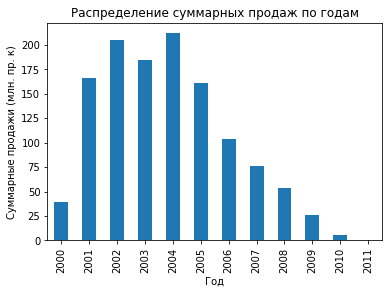

In [100]:
# выберем платформы с наибольшими суммарными продажами и построим распределение по годам
# изучим платформу ps2
df_ps2 = top_platforms[top_platforms['platform'] == 'ps2']
df_ps2.groupby('year_of_release')['total_sales'].agg('sum').plot(x='year_of_release', kind='bar')
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. пр. к)')
plt.show()

Пик суммарных продаж для ps2 приходится на 2001-2005 года. В 2011 году платформа уже прекращает свое существование.

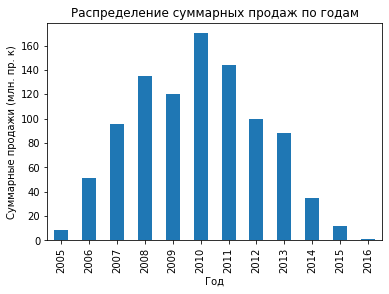

In [101]:
# изучим платформу x360
df_x360 = top_platforms[top_platforms['platform'] == 'x360']
df_x360.groupby('year_of_release')['total_sales'].agg('sum').plot(x='year_of_release', kind='bar')
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. пр. к)')
plt.show()

Пик суммарных продаж для x360 приходится на 2007-2013 года. В 2016 году платформа прекращает свое существование (что более вероятно, т.к. показатели в 2014 и 2015 годах уже достаточно низкие), либо данных на этот год мало, т.к. мы рассматриваем данные на момент 2016 года.

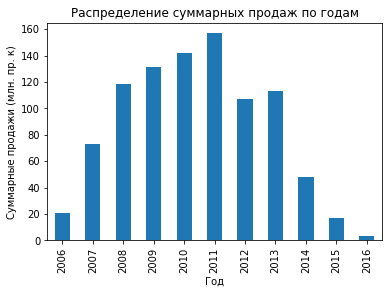

In [102]:
# изучим платформу ps3
df_ps3 = top_platforms[top_platforms['platform'] == 'ps3']
df_ps3.groupby('year_of_release')['total_sales'].agg('sum').plot(x='year_of_release', kind='bar')
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. пр. к)')
plt.show()

Пик суммарных продаж для ps3 приходится на 2008-2013 годы. В 2015-2016 году платформа также уходит на спад по прадажам.

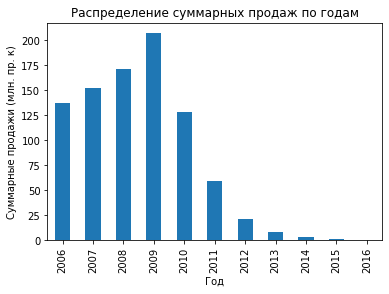

In [103]:
# изучим платформу wii
df_wii = top_platforms[top_platforms['platform'] == 'wii']
df_wii.groupby('year_of_release')['total_sales'].agg('sum').plot(x='year_of_release', kind='bar')
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. пр. к)')
plt.show()

Пик суммарных продаж для wii приходится на 2006-2010 года. В 2016 году платформа прекращает свое существование.

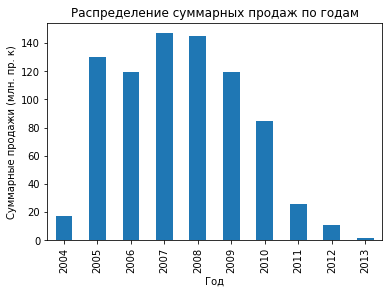

In [104]:
# изучим платформу ds
df_ds = df[df['platform'] == 'ds']
df_ds.groupby('year_of_release')['total_sales'].agg('sum').plot(x='year_of_release', kind='bar')
plt.title('Распределение суммарных продаж по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн. пр. к)')
plt.show()

Пик суммарных продаж для ds приходится на 2005-2009 года. В 2013 году платформа прекращает свое существование.

В среднем платформы начинают падать с 2011 года и прекращают свое существованеи в 2013-2016 году.

Все выбранные платформы с наибольшими суммарными продажами оказались "умирающими". Для дальнейшего исследования нужно рассмотреть и отобрать "живые" платформы из актуального периода.

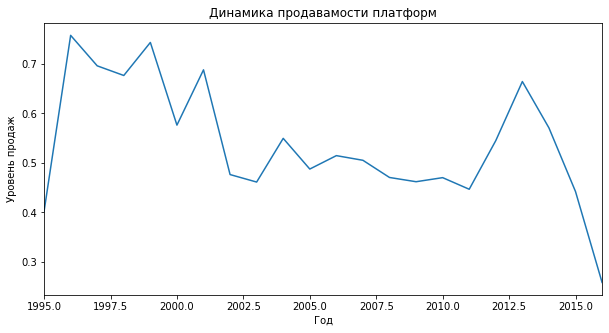

In [105]:
# посмотрим динамику продаваемости платформ, чтобы определить актуальный период
platforms_years = df.groupby('year_of_release')['total_sales'].mean().plot(figsize=(10,5))
plt.title('Динамика продавамости платформ')
plt.xlabel('Год')
plt.ylabel('Уровень продаж')
plt.show()

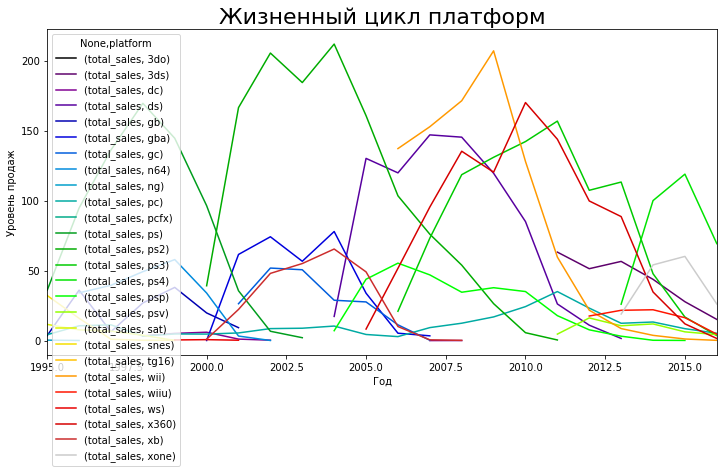

In [106]:
platforms_years = df.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).unstack('platform').plot(cmap='nipy_spectral', figsize=(12,6))
plt.title('Жизненный цикл платформ', fontsize=22)
plt.xlabel('Год')
plt.ylabel('Уровень продаж')
plt.show()

In [107]:
# Возьмем данные за актуальный период
actuals_platforms = df[df['year_of_release'] >= 2013]

Делаем срез данных с актуальным периодом, где платформа находится на пике популярности (уже начала хорошо продаваться, но еще не пошла на спад). Основываясь на динамике продаваемости платформ, актуальный период в среднем приходится после 2013 года.

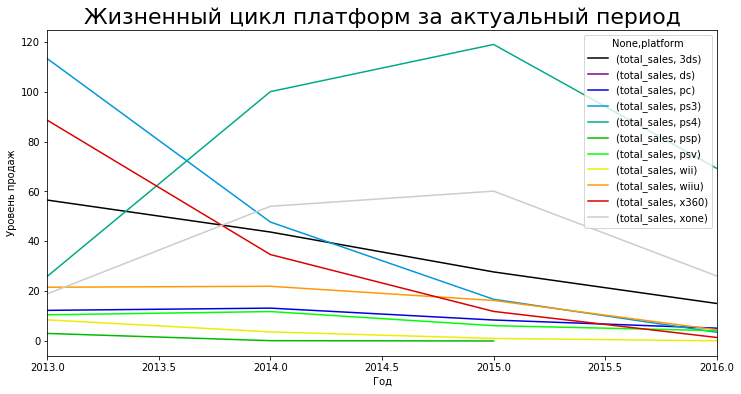

In [108]:
# построим линейный график жизненного цикла платформ
platforms_years = actuals_platforms.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).unstack('platform').plot(cmap='nipy_spectral', figsize=(12,6))
plt.title('Жизненный цикл платформ за актуальный период', fontsize=22)
plt.xlabel('Год')
plt.ylabel('Уровень продаж')
plt.show()

На графике видно, что платформы "ps4" и "xone" начинают свою деятельнось в 2013 году и вплоть до 2016 года имеют перспективную прибыль. Платформа "3ds" существует еще до 2011 года и тоже имеет хорошие продажи. Также есть еще несколько платформ, которые можно рассмотреть подробней.

In [109]:
# создадим таблицу с топ-5 лидирующими платформами 
leader_platforms = actuals_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
leader_platforms = actuals_platforms[actuals_platforms['platform'].isin(leader_platforms.index)]
leader_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,nan,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,nan,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


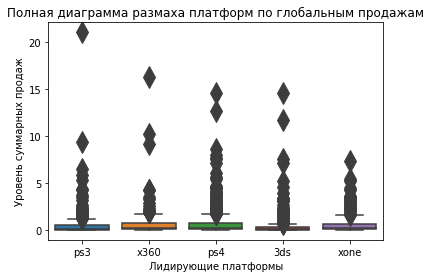

In [110]:
# строим график «ящик с усами» по продажами игр в разбивке по платформам
sns.boxplot(data=leader_platforms , y='total_sales', x='platform', fliersize=15)
plt.title('Полная диаграмма размаха платформ по глобальным продажам')
plt.xlabel('Лидирующие платформы')
plt.ylabel('Уровень суммарных продаж')
#plt.ylim(-0.2, 2)
plt.show()

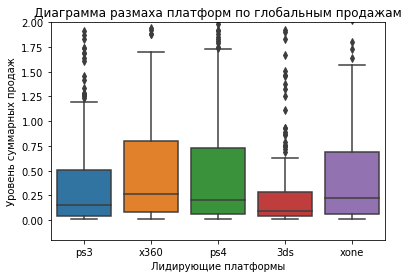

In [111]:
# строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
sns.boxplot(data=leader_platforms , y='total_sales', x='platform')
plt.title('Диаграмма размаха платформ по глобальным продажам')
plt.xlabel('Лидирующие платформы')
plt.ylabel('Уровень суммарных продаж')
plt.ylim(-0.2, 2)
plt.show()

 Был построен график «ящик с усами» по глобальным продажам платформ за актуальный период. График показывет, что наиболее популярные и  потенциально лидирующие по прадажам платформы "ps4", "xone" и "x360".
По прошлым рассматриваемым графикам мы убедились, что платформы "х360" и "ps3" умирающие, поэтому рассматривать подробней мы их уже не будем.

In [112]:
# посчитаем корреляцию между отзывами и продажами платформ
platforms = ['ps4', '3ds', 'xone']
for platform in platforms:
    display(platform, leader_platforms[leader_platforms['platform'] == platform][['total_sales', 'user_score','critic_score']].corr())
 

'ps4'

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


'3ds'

,total_sales,user_score,critic_score
total_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


'xone'

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


В таблицах корреляции видно, что платформы 'ps4' и 'xone' имеют небольшую отрицательную корреляцию между оценками пользователей и продажами, что говорит о том, что их связь практически отстусвует. Самая большая корреляция между оценками критиков и пользователей.

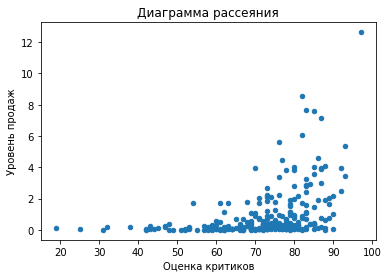

In [113]:
# посмотрим диаграмму рассеяния
leader_platforms.query('platform == "ps4"').plot(kind='scatter', x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния')
plt.xlabel('Оценка критиков')
plt.ylabel('Уровень продаж')
plt.show()

Чем больше оценка критиков и пользователей, тем выше суммарные продажи,  что в принципе разумно.

/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


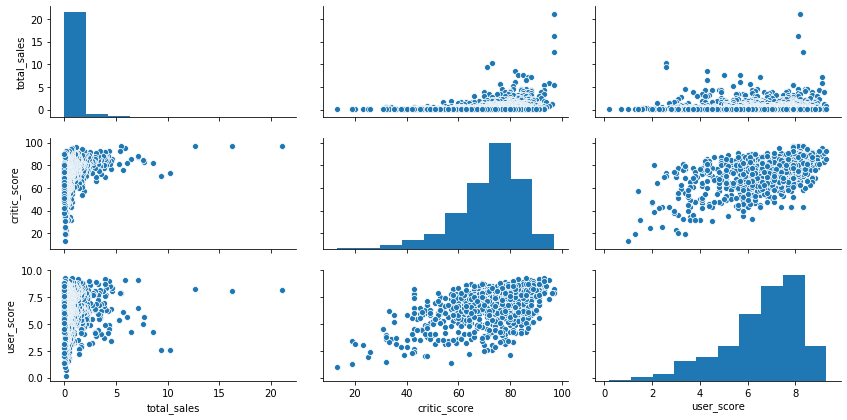

In [114]:
# посмотрим корреляцию по платформам за актуальный период
actuals_platforms[['total_sales', 'critic_score', 'user_score']].corr()
sns.pairplot(actuals_platforms[['total_sales', 'critic_score', 'user_score']], height=2, aspect=2, palette = "hus1")
plt.show()


Оцениваем взаимосвязь указанных признаков (суммарные продажи, оценки критиков и пользователей) по всем другим платформам за актуальный период. Наибольшая корреляция, как и в изучаемых выше платформах приходиться на оценки критиков и пользователей.

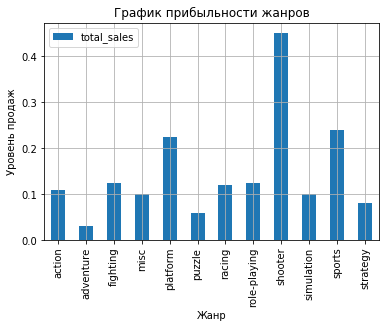

In [115]:
# посмотрим прибыльность жанров
actuals_platforms.pivot_table(index='genre', values='total_sales', aggfunc='median').plot(kind='bar', grid=True)
plt.title('График прибыльности жанров')
plt.xlabel('Жанр')
plt.ylabel('Уровень продаж')
plt.show()

Самыми прибыльными жанрами оказались 'shooter', 'sports' и 'platform'.

## Составление портрета пользователя каждого региона


/Users/polina_lunyova/opt/anaconda3/envs/praktikum_env_macos/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


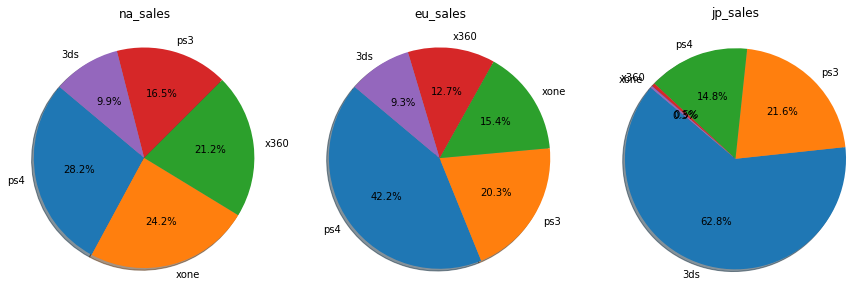

In [116]:
# определяем долевые значения продаж платформ по регионам 
regions_sales = ['na_sales', 'eu_sales', 'jp_sales']

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    df_top = leader_platforms.pivot_table(index='platform', values = regions_sales[i], aggfunc = {regions_sales[i]: 'sum'})\
    .rename(columns={regions_sales[i]: 'sum'})\
    .sort_values(by = 'sum', ascending=False).head()   
    labels = df_top.index
    sizes = df_top.values
    axs[i].set_title(regions_sales[i])
    axs[i].pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
    axs[i].axis("equal")
plt.show()   

Наибольшие продажи в Европе и Северной Америке приходится на платформу "ps4", также платформa "xone" имеет хорошую долю от продаж.
В Японии большой процент продаж составляет платформа 3ds.

In [117]:
# топ-5 самых популярных платформ по продажам в Северной Америке 
na_top_platforms = leader_platforms.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).head()
# посчитаем долю от общих продаж
na_top_platforms['share_of_na'] = (na_top_platforms / df['na_sales'].sum()).round(3) 
display('Популярные платфомы по прадажам в Северной Америке', na_top_platforms)

# топ-5 самых популярных платформ по продажам в Европе 
eu_top_platforms = leader_platforms.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).head()
# посчитаем долю от общих продаж
eu_top_platforms['share_of_eu'] = (eu_top_platforms / df['eu_sales'].sum()).round(3)
display('Популярные платфомы по прадажам в Европе', eu_top_platforms) 

# топ-5 самых популярных платформ по продажам в Японии
jp_top_platforms = leader_platforms.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).head()
# посчитаем долю от общих продаж
jp_top_platforms['share_of_jp'] = (jp_top_platforms / df['jp_sales'].sum()).round(3)
display('Популярные платфомы по прадажам в Японии', jp_top_platforms)

'Популярные платфомы по прадажам в Северной Америке'

,na_sales,share_of_na
platform,,
ps4,108.74,0.027
xone,93.12,0.023
x360,81.66,0.020
ps3,63.50,0.016
3ds,38.20,0.010


'Популярные платфомы по прадажам в Европе'

,eu_sales,share_of_eu
platform,,
ps4,141.09,0.061
ps3,67.81,0.029
xone,51.59,0.022
x360,42.52,0.018
3ds,30.96,0.013


'Популярные платфомы по прадажам в Японии'

,jp_sales,share_of_jp
platform,,
3ds,67.81,0.063
ps3,23.35,0.022
ps4,15.96,0.015
x360,0.51,0.000
xone,0.34,0.000


Среди топ-5 самых популярных платформ по продажам в Европе и Северной Америке лидирует платформа ps4 (0.027 и 0.061), далее идут платформы примерно с  одинаковым уровнем продаж xone(0.023).

В Японии самой популярной платформой является 3ds с долей продаж 0.063

In [118]:
# топ-5 самых популярных жанров в Северной Америке
top_genre_na = leader_platforms.pivot_table(index='genre', values = 'na_sales', aggfunc = 'median').sort_values(by = 'na_sales', ascending=False).head()
display('Топ популярных жанров в Северной Америке', top_genre_na)

# топ-5 самых популярных жанров в Европе
top_genre_eu = leader_platforms.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'median').sort_values(by = 'eu_sales', ascending=False).head()
display('Топ популярных жанров в Европе', top_genre_eu)

# топ-5 самых популярных жанров в Японии
top_genre_jp = leader_platforms.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'median').sort_values(by = 'jp_sales', ascending=False).head()
display('Топ популярных жанров в Японии', top_genre_jp)


'Топ популярных жанров в Северной Америке'

,na_sales
genre,
shooter,0.29
sports,0.15
platform,0.09
fighting,0.05
racing,0.04


'Топ популярных жанров в Европе'

,eu_sales
genre,
shooter,0.210
racing,0.105
platform,0.080
sports,0.060
action,0.030


'Топ популярных жанров в Японии'

,jp_sales
genre,
role-playing,0.06
puzzle,0.04
fighting,0.03
simulation,0.02
strategy,0.02


Самым популярным жанром в Северной Америке и Европе стал 'shooter' с долей продаж 0.29 и 0.21, за ними следуют 'sports' и 'racing'.

В Японии самый популярный жанр role-playing	(0.06).

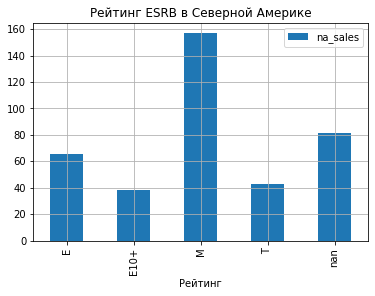

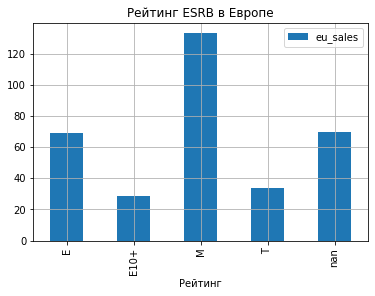

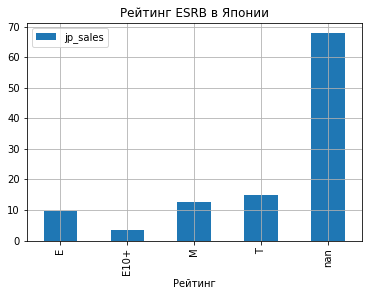

In [119]:
# посмотрим влияние ESRB на продажи в отдельных регионах
na_esrb_rating = leader_platforms.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar', grid=True)
plt.title('Рейтинг ESRB в Северной Америке')
plt.xlabel('Рейтинг')
plt.show()

eu_esrb_rating = leader_platforms.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True)
plt.title('Рейтинг ESRB в Европе')
plt.xlabel('Рейтинг')
plt.show()

jp_esrb_rating = leader_platforms.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True)
plt.title('Рейтинг ESRB в Японии')
plt.xlabel('Рейтинг')
plt.show()

Были построены столбчатые диаграммы влияния рейтинга ESRB по продажам в отдельных регионах. ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

На диаграмме видно, что в Европе и Северной Америке лилирует рейтинг "М"('Mature 17+' — от 17 лет). В Японии с большим отрывом лидируют игры без рейтинга ESRB. 

Из всех регионов наибольший показатель имеет Северная Америка.

## Проверка гипотез

Проверим первую гепотезу "средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевая гипотеза (H₀) – это гипотеза, в которой мы утверждаем, что не существует никаких отношений или различий между двумя наблюдаемыми событиями. Нулевая гипотеза считается верной, пока нельзя доказать обратное.

Альтернативная гипотеза - это утверждение, которое принимается верным, если отбрасывается H₀.

In [120]:
# проверка гипотезы о равности средних пользовательских рейтинов платформ Xbox One и PC 
rating_xone = actuals_platforms.query('platform == "xone"')['user_score']
rating_pc = actuals_platforms.query('platform == "pc"')['user_score']
results = st.ttest_ind(rating_xone, rating_pc, equal_var=False, nan_policy='omit') 
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.1475959401343003
Не получилось отвергнуть нулевую гипотезу


С помощью гипотезы о равенстве средних двух генеральных совокупностей мы проверили, различаются ли средние пользовательские рейтинги платформ Xbox One и PC.
Нулевую гипотезу отвергнуть не удалось.

Проверка второй гепотезы "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".



In [121]:
# проверка гипотезы равности средних пользовательских рейтинов жанров Action и Sports
rating_action = actuals_platforms.query('genre == "action"')['user_score']
rating_sports = actuals_platforms.query('genre == "sports"')['user_score']
results = st.ttest_ind(rating_action, rating_sports, equal_var = False, nan_policy='omit') 
alpha = .05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

p-значение:  1.446003970070351e-20
Отвергаем нулевую гипотезу


Гипотеза о равенстве средних двух генеральных совокупностей не подтвердилась, это значит, что средние пользовательские рейтинги жанров Action и Sports разные".

## Общий вывод

В ходе работы были изучены игровые платформы разных регионов. Исходя из доступных данных о продажах игр был произведен расчет суммарных продаж во всех регионах.

Далее был построен график продаж по плаформам, на котором видна динамика всех платформ.
В топ-5 платформ по продажам вошли:

1. PS2
2. X360
3. PS3
4. WII
5. DS

По этим платформам было построено распределение по годам. Оказалось, что в среднем платформы начинают свое падение начиная с 2011 года и прекращают свое существованеи в 2013-2016 году. Такие платформы называются "умирающими" и по ним не целесообразно делать какие-либо прогнозы на будущее.

Для дальнейшего исследования были отобраны "живые" платформы из актуального периода, где платформа находится на пике популярности (уже начала хорошо продаваться, но еще не пошла на спад). Основываясь на динамике продаваемости платформ, актуальный период в среднем приходится после 2013 года.

На графике с актуальными платформами видно, что платформы "ps4" и "xone" начинают свою деятельнось в 2013 году и вплоть до 2016 года имеют перспективную прибыль. Платформа "3ds" существует еще до 2011 года и тоже имеет хорошие продажи. 

Далее рассмотрена взаимосвязь таких признаков как суммарные продажи, оценки критиков и пользователей по всем другим платформам за актуальный период. Наибольшая корреляция приходиться на оценки критиков и пользователей. Чем больше оценка критиков и пользователей, тем выше суммарные продажи, что в принципе разумно. Также были выявлены самые прибыльные жанры: 'shooter', 'sports' и 'platform'. Наибольшие продажи в Европе и Северной Америке приходится на платформу "ps4", также платформa "xone" имеет хорошую долю от продаж. В Японии большой процент продаж составляет платформа 3ds. Самым популярным жанром в Северной Америке и Европе стал 'shooter' с долей продаж 0.29 и 0.21, за ними следуют 'sports' и 'racing'. В Японии самый популярный жанр role-playing (0.06).

Были построены столбчатые диаграммы влияния рейтинга ESRB по продажам в отдельных регионах. ESRB определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. На диаграмме видно, что в Европе и Северной Америке лилирует рейтинг "М"('Mature 17+' — от 17 лет). В Японии с большим отрывом лидируют игры без рейтинга ESRB. Рейтинг ESRB не оказывает большого влияния на продажи игр в Японии, в отличие от Северной Америки и Европы.


Также были проверены две гипотезы:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные

Первую гипотезу опровергнуть не удалось. Это означает, что пользовательские рейтинги платформ Xbox One и PC одинаковые.
Вторая гипотеза была опровергнута, значит средние пользовательские рейтинги жанров Action и Sports действительно разные.
